NIM : <br> 221351073
nama : <br> M. Yogi Dwiyanto
kelas : Pagi C

# import library

In [1]:
# di sini diberikan list library yang dgunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score,confusion_matrix


# load dataset

In [2]:
# load dataset uts
df = pd.read_csv('Customer_Loyalty.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Income,Tenure,ServiceCalls,MonthlyCharges,InternetService,Contract,PaymentMethod,Dependents,Partner,StreamingService,LoyaltyStatus
0,1,Male,57,43360,8,4,40.25,DSL,Month-to-month,Electronic check,0,0,No,Churn
1,2,Male,65,28255,11,2,41.35,Fiber optic,Month-to-month,Credit card,0,0,Yes,Loyal
2,3,Male,69,88235,2,9,29.22,DSL,Month-to-month,Mailed check,0,1,Yes,Loyal
3,4,Female,47,107464,9,3,61.59,DSL,Two year,Credit card,1,1,No,Loyal
4,5,Female,79,68169,6,11,81.56,No,Two year,Mailed check,0,0,No,Loyal


# exploratory data analysis

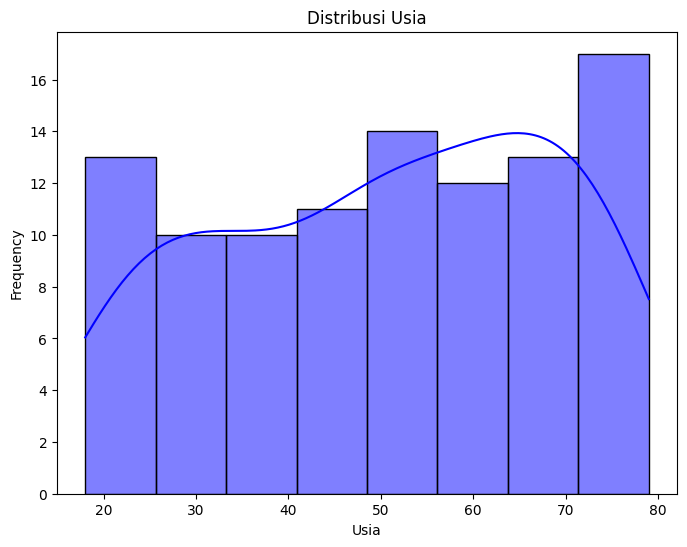

In [4]:
# eda varian 1
plt.figure(figsize=(8,6))
sns.histplot(x='Age', data=df, kde=True,color='blue')
plt.title("Distribusi Usia")
plt.xlabel('Usia')
plt.ylabel('Frequency')
plt.show()


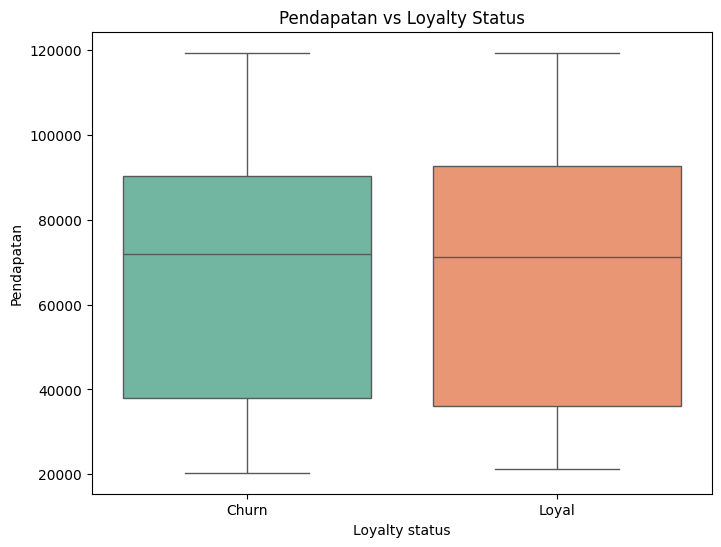

In [5]:
# eda varian 2
plt.figure(figsize=(8,6))
sns.boxplot(x='LoyaltyStatus', y='Income', hue='LoyaltyStatus', palette='Set2', data=df)
plt.title("Pendapatan vs Loyalty Status")
plt.xlabel('Loyalty status')
plt.ylabel('Pendapatan')
plt.show()

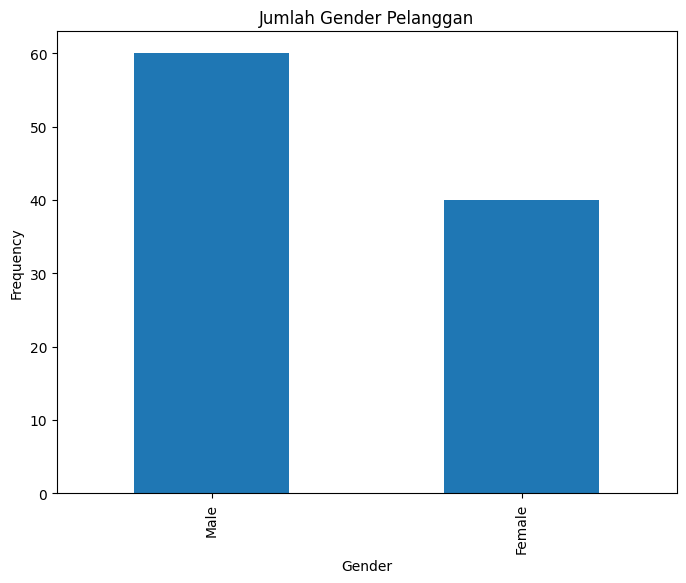

In [6]:
# eda varian 3
plt.figure(figsize=(8,6))
df['Gender'].value_counts().plot(kind='bar')
plt.title('Jumlah Gender Pelanggan')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

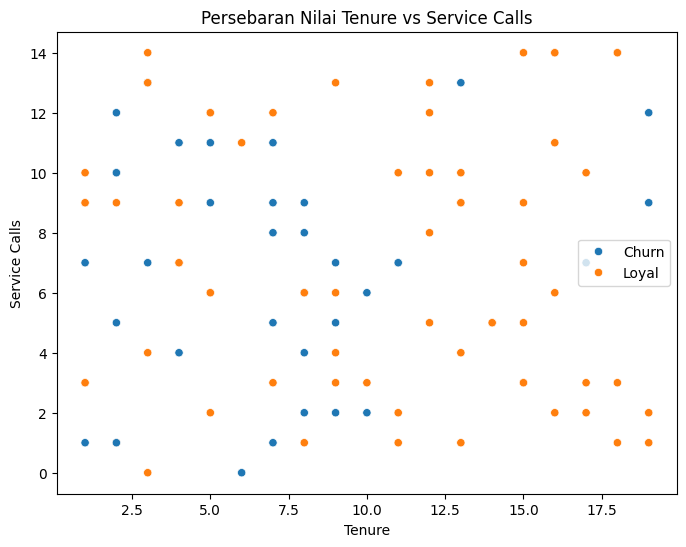

In [7]:
# eda varian 4
plt.figure(figsize=(8,6))
sns.scatterplot(x='Tenure', y='ServiceCalls',hue='LoyaltyStatus', data=df)
plt.xlabel("Tenure")
plt.ylabel('Service Calls')
plt.title('Persebaran Nilai Tenure vs Service Calls')
plt.legend()
plt.show()

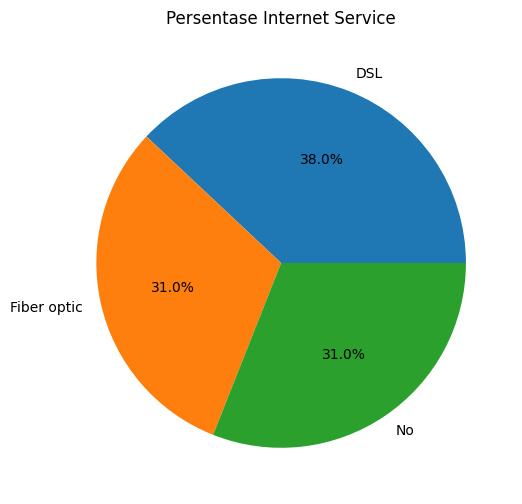

In [8]:
# eda varian 5
plt.figure(figsize=(8,6))
df['InternetService'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Persentase Internet Service')
plt.ylabel("")
plt.show()


# data preprocessing

In [9]:
df.head()

,CustomerID,Gender,Age,Income,Tenure,ServiceCalls,MonthlyCharges,InternetService,Contract,PaymentMethod,Dependents,Partner,StreamingService,LoyaltyStatus
0,1,Male,57,43360,8,4,40.25,DSL,Month-to-month,Electronic check,0,0,No,Churn
1,2,Male,65,28255,11,2,41.35,Fiber optic,Month-to-month,Credit card,0,0,Yes,Loyal
2,3,Male,69,88235,2,9,29.22,DSL,Month-to-month,Mailed check,0,1,Yes,Loyal
3,4,Female,47,107464,9,3,61.59,DSL,Two year,Credit card,1,1,No,Loyal
4,5,Female,79,68169,6,11,81.56,No,Two year,Mailed check,0,0,No,Loyal


In [10]:
# di sini dilakukan preprocessing data sesuai kebutuhan algoritma
df = df.drop(columns=['Tenure'])
df = df.drop(columns=['ServiceCalls'])
df = df.drop(columns=['MonthlyCharges'])
df = df.drop(columns=['StreamingService'])
df = df.drop(columns=['InternetService'])
df = df.drop(columns=['Contract'])
df = df.drop(columns=['CustomerID'])


In [11]:
df.head()

,Gender,Age,Income,PaymentMethod,Dependents,Partner,LoyaltyStatus
0,Male,57,43360,Electronic check,0,0,Churn
1,Male,65,28255,Credit card,0,0,Loyal
2,Male,69,88235,Mailed check,0,1,Loyal
3,Female,47,107464,Credit card,1,1,Loyal
4,Female,79,68169,Mailed check,0,0,Loyal


In [12]:
label_encoder_gender = LabelEncoder()
label_encode_internet_service = LabelEncoder()
label_encoder_paymentMethod = LabelEncoder()
label_encoder_dependents = LabelEncoder()
label_encoder_loyaltystatus = LabelEncoder()

In [13]:
df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
df['PaymentMethod'] = label_encoder_paymentMethod.fit_transform(df['PaymentMethod'])
df['LoyaltyStatus'] = label_encoder_loyaltystatus.fit_transform(df['LoyaltyStatus'])

In [14]:
df.head()

,Gender,Age,Income,PaymentMethod,Dependents,Partner,LoyaltyStatus
0,1,57,43360,2,0,0,0
1,1,65,28255,1,0,0,1
2,1,69,88235,3,0,1,1
3,0,47,107464,1,1,1,1
4,0,79,68169,3,0,0,1


# modeling

In [15]:
# buatkan model sesuai arahan soal
df['Age'] = pd.cut(df['Age'], bins=[0,30,40,50,60,80], labels=[0,1,2,3,4])
df['Income'] = pd.cut(df['Income'], bins=[0,20000,40000,60000,80000,200000], labels=[0,1,2,3,4])

In [16]:
X_categorical = df[['Gender','Age', 'Income', 'PaymentMethod','Dependents','Partner']]
y_categorical = df['LoyaltyStatus']

In [17]:
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_categorical, y_categorical, test_size=0.3, random_state=42)

In [18]:
cat_nb_model = CategoricalNB()
cat_nb_model.fit(X_train_cat, y_train_cat)

CategoricalNB()

In [19]:
y_pred_cat = cat_nb_model.predict(X_test_cat)

In [20]:
df.head()

,Gender,Age,Income,PaymentMethod,Dependents,Partner,LoyaltyStatus
0,1,3,2,2,0,0,0
1,1,4,1,1,0,0,1
2,1,4,4,3,0,1,1
3,0,2,4,1,1,1,1
4,0,4,3,3,0,0,1


# simulasi

In [21]:
# simulasikan model dengan inputan baru
new_data_categorical = np.array([[1,3,2,1,1.1,0]]) 
new_prediction_cat = cat_nb_model.predict(new_data_categorical)

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


In [22]:
(new_prediction_cat)

array([1])

In [23]:
if (new_prediction_cat[0]==0):
    print ('Churn')
else:
    print('Loyal')   

Loyal


# evaluasi

In [24]:
# menampilkan akurasi / confusion matrix
cat_accuracy = accuracy_score(y_test_cat, y_pred_cat)

In [25]:
cat_conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)

In [26]:
(cat_accuracy, cat_conf_matrix)

(0.6,
 array([[ 1,  6],
        [ 6, 17]]))